# Assignment 2: Polynomial Regression - Ice Cream Sales Prediction

## Objective
Use polynomial regression to model the nonlinear relationship between temperature and ice cream sales, and determine the optimal polynomial degree.

## Dataset
You have been provided with a dataset (`assignment2_icecream.csv`) containing:
- **Temperature**: Daily temperature in Fahrenheit (30-100°F)
- **Sales**: Ice cream sales in thousands of dollars

## Background
Not all relationships are linear! When a scatter plot shows a curved pattern, polynomial regression can capture that nonlinear relationship. In this assignment, you'll:
1. Explore why linear regression might not be sufficient
2. Fit polynomial models of different degrees
3. Use train/validation/test splits to select the best model
4. Avoid overfitting by comparing validation performance

## Tasks

Complete all sections below.

## Part 1: Import Libraries and Load Data

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset
icecream = pd.read_csv(r'C:\Users\casey\OneDrive\Desktop\Data Analytics\assignment2_icecream.csv')


## Part 2: Exploratory Data Analysis

**Task 2.1**: Display the first 10 rows and summary statistics.

In [7]:
print(icecream.head(10)) # first 10 rows
print("\nSummary Statistics: \n")
print(icecream.describe())


   Temperature   Sales
0         79.6  231.06
1         38.6  166.65
2         32.7  185.98
3         65.1  230.57
4         81.9  213.56
5         52.3  187.85
6        108.1  425.64
7         78.5  254.35
8         58.1  212.23
9         49.2  206.11

Summary Statistics: 

       Temperature       Sales
count   500.000000  500.000000
mean     59.443600  229.904560
std      28.630104   76.383368
min      10.000000   74.970000
25%      35.775000  181.592500
50%      58.100000  211.970000
75%      82.950000  255.502500
max     109.900000  459.630000


**Task 2.2**: Create a scatter plot of Sales vs Temperature. Does the relationship appear linear?

Add appropriate labels and title.

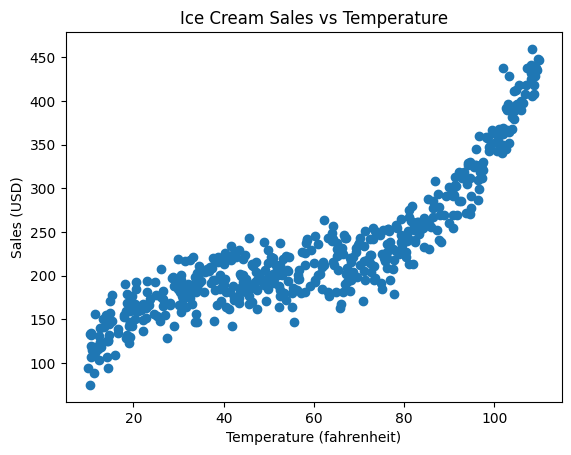

In [ ]:
temp = icecream['Temperature']
sales = icecream['Sales']
plt.scatter(temp, sales)
plt.ylabel("Sales (USD)")
plt.xlabel("Temperature (fahrenheit)")
plt.title("Ice Cream Sales vs Temperature")
plt.show()

**Task 2.3**: Based on the scatter plot, describe the pattern you see. Is it linear or nonlinear? Why?

The pattern is non-linear. Sales have a **positive correlation** with temperature, but it's not a linear relationship. Sales increase dramatically as the temperature gets closer to 100 degrees fahrenheit. There is not a constant rate of change.


## Part 3: Prepare Data with Train/Validation/Test Split

**Task 3.1**: Split the data into features (X) and target (y).

In [ ]:
x_feat = icecream['Temperature'] # feature
y_feat = icecream['Sales'] # target

**Task 3.2**: Perform a train/validation/test split:
- Training: 60% of data
- Validation: 20% of data  
- Test: 20% of data

Use `random_state=42` for reproducibility.

*Hint: You'll need to do two train_test_split calls - first split off the test set, then split the remaining data into train and validation.*

In [20]:
# seperate test set (temp is temporarily holding data)
x_temp, x_test, y_temp, y_test = train_test_split(x_feat, y_feat, test_size=0.2, random_state=42) 
# train and validation (0.25 * 0.8 = 20% of data for validation)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42) 

**Task 3.3**: Print the shapes of all six arrays to verify the split.

In [18]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape) # validation
print("Shape of x_val:", x_val.shape)


Shape of x_test: (100,)
Shape of y_test: (100,)
Shape of x_train: (300,)
Shape of y_train: (300,)
Shape of x_val: (100,)
Shape of x_val: (100,)


## Part 4: Fit a Linear Model (Baseline)

**Task 4.1**: Fit a simple linear regression model (polynomial degree 1) to the training data and make predictions on train, validation, and test sets.

In [54]:
# reshaping is done to convert to a two-dimensional format for predictions
x_train_r = np.array(x_train).reshape(-1, 1)
x_val_r   = np.array(x_val).reshape(-1, 1)
x_test_r  = np.array(x_test).reshape(-1, 1)

model = LinearRegression()
lin_reg = model.fit(x_train_r, y_train) # fitting the model on training data
y_pred_test = model.predict(x_test_r)
y_pred_train = model.predict(x_train_r)
y_pred_val   = model.predict(x_val_r)

**Task 4.2**: Calculate and display R² and RMSE for the linear model on all three sets (train, validation, test).

In [ ]:
# set name: actual data, prediction
sets = {
    "Train": (y_train, y_pred_train),
    "Validation": (y_val, y_pred_val),
    "Test": (y_test, y_pred_test)
}

# find r2, mse, rmse, for each set. 
for set_name, (y_real, y_pred) in sets.items(): # based on dictionary structure
    r2 = r2_score(y_real, y_pred) # compare actual data to prediction for that set
    mse_test = mean_squared_error(y_real, y_pred) # Calculate MSE 
    rmse_test = np.sqrt(mse_test) # take the square root for RMSE

    print(f"\n--- SLR Model Evaluation ({set_name} Set) ---")
    print(f"R-squared (R²): {r2:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")




--- SLR Model Evaluation (Train Set) ---
R-squared (R²): 0.782
Root Mean Squared Error (RMSE): 35.58

--- SLR Model Evaluation (Validation Set) ---
R-squared (R²): 0.809
Root Mean Squared Error (RMSE): 35.16

--- SLR Model Evaluation (Test Set) ---
R-squared (R²): 0.715
Root Mean Squared Error (RMSE): 38.43


**Task 4.3**: Visualize the linear model's fit by plotting:
- Training data as scatter points
- Linear regression line

### Does the line capture the pattern well?

The line doesn't completely capture the pattern. The sales increase significantly as they approach 100 degrees fahrenheit, growing more than a 1:1 correlation between temperature and sales.

<Figure size 640x480 with 0 Axes>

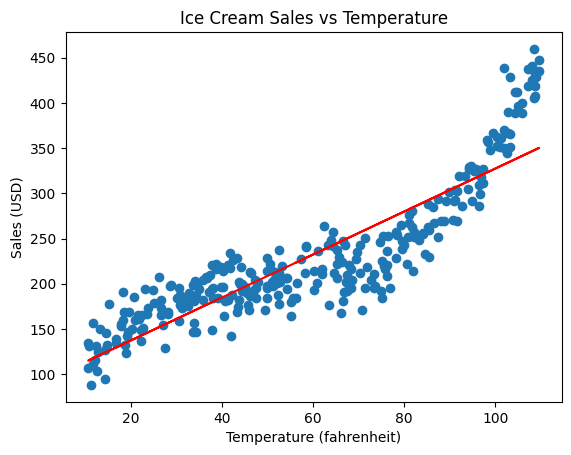

In [61]:
plt.clf()
fig  = plt.figure()
ax = fig.add_subplot()

ax.scatter(x_train, y_train)
ax.plot(x_train_r, lin_reg.predict(x_train_r), color='red')
plt.ylabel("Sales (USD)")
plt.xlabel("Temperature (fahrenheit)")
plt.title("Ice Cream Sales vs Temperature")
plt.show()


## Part 5: Fit Polynomial Models

**Task 5.1**: Create and fit polynomial regression models for degrees 2, 3, 4, 5, and 8.

For each polynomial degree:
1. Use PolynomialFeatures to transform the features
2. Fit a LinearRegression model
3. Make predictions on train, validation, and test sets
4. Calculate R² and RMSE for all three sets
5. Store the results

Store your results in a dictionary or DataFrame for easy comparison.

In [10]:
# YOUR CODE HERE


**Task 5.2**: Create a summary table showing R² and RMSE for each polynomial degree on train, validation, and test sets.

Display it as a well-formatted pandas DataFrame.

In [11]:
# YOUR CODE HERE


## Part 6: Model Selection

**Task 6.1**: Create a line plot showing how R² changes with polynomial degree for train, validation, and test sets.

Use different colors/markers for each set and include a legend.

In [12]:
# YOUR CODE HERE


**Task 6.2**: Create a line plot showing how RMSE changes with polynomial degree for train, validation, and test sets.

In [13]:
# YOUR CODE HERE


**Task 6.3**: Based on the validation set performance, which polynomial degree would you select as the best model? Explain your reasoning.

**YOUR ANSWER HERE:**


**Task 6.4**: Do you see any evidence of overfitting? If so, at which polynomial degree(s)? Explain what signs indicate overfitting.

**YOUR ANSWER HERE:**


## Part 7: Visualize the Best Model

**Task 7.1**: Create a visualization showing:
1. Training data as scatter points
2. The fitted curve for your selected best polynomial degree

*Hint: To create a smooth curve, generate predictions for a range of temperature values sorted in order.*

In [14]:
# YOUR CODE HERE


**Task 7.2**: Create a 2x2 subplot comparing polynomial degrees 1, 3, 5, and 8.

Each subplot should show:
- Training data as scatter points
- Fitted curve for that polynomial degree
- Title indicating the degree and validation R²

In [15]:
# YOUR CODE HERE


## Part 8: Final Model Evaluation

**Task 8.1**: Report the final performance of your selected model on the test set.

Calculate and display:
- R² Score
- RMSE
- MAE

In [16]:
# YOUR CODE HERE


**Task 8.2**: Create an actual vs predicted plot for your best model on the test set.

In [17]:
# YOUR CODE HERE


## Part 9: Practical Application

**Task 9.1**: Use your best model to predict ice cream sales for the following temperatures:
- 45°F
- 70°F
- 85°F

Display the predictions clearly.

In [18]:
# YOUR CODE HERE


**Task 9.2**: Do the predictions seem reasonable based on the training data? Why or why not?

**YOUR ANSWER HERE:**


## Part 10: Reflection Questions

**Task 10.1**: Explain in your own words why we use a validation set in addition to train and test sets.

**YOUR ANSWER HERE:**


**Task 10.2**: What would happen if we chose the polynomial degree based on test set performance instead of validation set performance?

**YOUR ANSWER HERE:**


**Task 10.3**: In this assignment, we tested polynomial degrees 1, 2, 3, 4, 5, and 8. How might you systematically search for the optimal degree in a real-world scenario?

**YOUR ANSWER HERE:**


## Submission

Ensure that:
1. All code cells execute without errors
2. All visualizations are properly displayed
3. All written responses are complete and demonstrate understanding
4. Your summary table clearly shows the performance of different polynomial degrees
5. You've clearly identified and justified your choice of the best model

**Due Date:** [To be announced by instructor]

---
*ISM4641 - Python for Business Analytics*  
*University of South Florida*  
*August 2025*